In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
import gradio as gr

In [2]:
df=pd.read_csv(r"C:\Users\akhil\OneDrive\Desktop\akhil anand\project data\Greenhouse Plant Growth Metrics.csv")
df

,Random,ACHP,PHR,AWWGV,ALAP,ANPL,ARD,ADWR,PDMVG,ARL,AWWR,ADWV,PDMRG,Class
0,R1,34.533468,54.566983,1.147449,1284.229549,4.999713,16.274918,1.706810,18.399982,19.739037,2.949240,0.209251,57.633906,SA
1,R1,34.489028,54.567692,1.149530,1284.247744,5.024259,16.269452,1.700930,18.398289,19.758836,2.943137,0.216154,57.633697,SA
2,R2,33.100405,67.067344,1.104647,1009.208996,5.007652,15.980760,1.185391,19.398789,20.840822,2.861635,0.200113,41.289875,SA
3,R1,34.498319,54.559049,1.137759,1284.227623,4.991501,16.276710,1.716396,18.413613,19.736098,2.946784,0.223092,57.645661,SA
4,R3,36.297008,45.588894,1.363205,981.470310,4.003682,16.979894,0.777428,31.423772,17.331894,2.766242,0.424172,27.898619,SA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,R3,46.400873,50.830830,0.883813,744.310093,4.012024,17.796293,1.085930,12.812881,18.457811,3.264946,0.108366,33.343799,TC
29996,R3,46.395047,50.838058,0.900390,744.307234,4.011764,17.809462,1.108226,12.822240,18.457313,3.259574,0.129387,33.338906,TC
29997,R2,32.707725,37.065408,0.909055,857.849380,2.992712,18.200984,0.903880,8.050019,19.070005,3.495121,0.056698,26.041147,TC
29998,R1,38.624079,37.876323,1.077557,948.663424,4.002284,15.733098,1.238818,11.953827,19.164418,3.141850,0.116892,39.125346,TC


EDA (Exploratory Data Analysis)

In [4]:
df.describe()


,ACHP,PHR,AWWGV,ALAP,ANPL,ARD,ADWR,PDMVG,ARL,AWWR,ADWV,PDMRG
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,38.060575,59.020331,1.247257,1063.639833,3.944789,16.285792,1.000981,22.674553,18.071061,2.907011,0.292094,34.922184
std,4.441682,11.985213,0.245989,260.712823,0.702537,2.882793,0.456292,9.571091,2.932830,1.361928,0.151516,7.998132
min,32.664004,37.020398,0.848351,658.488225,2.959173,11.075737,0.241972,8.021505,12.359924,1.126715,0.038210,23.632527
25%,34.399604,51.059436,1.064865,875.501356,3.013099,13.933350,0.675892,14.980983,15.600294,1.911408,0.185512,28.650713
50%,36.575753,55.912058,1.211328,1009.249081,3.998577,16.248496,0.833799,21.954006,18.477019,2.818611,0.246454,33.372665
75%,42.300836,67.069465,1.501692,1243.866525,4.015829,18.202577,1.313504,27.711471,20.365252,3.254133,0.407858,39.137224
max,46.431668,77.040610,1.775383,1751.031654,5.037358,23.325870,2.196556,43.660373,23.253049,6.908923,0.687470,57.672004


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Random  30000 non-null  object 
 1   ACHP    30000 non-null  float64
 2   PHR     30000 non-null  float64
 3   AWWGV   30000 non-null  float64
 4   ALAP    30000 non-null  float64
 5   ANPL    30000 non-null  float64
 6   ARD     30000 non-null  float64
 7   ADWR    30000 non-null  float64
 8   PDMVG   30000 non-null  float64
 9   ARL     30000 non-null  float64
 10  AWWR    30000 non-null  float64
 11  ADWV    30000 non-null  float64
 12  PDMRG   30000 non-null  float64
 13  Class   30000 non-null  object 
dtypes: float64(12), object(2)
memory usage: 3.2+ MB


In [6]:
df.isna().sum()

Random    0
ACHP      0
PHR       0
AWWGV     0
ALAP      0
ANPL      0
ARD       0
ADWR      0
PDMVG     0
ARL       0
AWWR      0
ADWV      0
PDMRG     0
Class     0
dtype: int64

In [7]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Length: 30000, dtype: bool

In [8]:
df.head()

,Random,ACHP,PHR,AWWGV,ALAP,ANPL,ARD,ADWR,PDMVG,ARL,AWWR,ADWV,PDMRG,Class
0,R1,34.533468,54.566983,1.147449,1284.229549,4.999713,16.274918,1.706810,18.399982,19.739037,2.949240,0.209251,57.633906,SA
1,R1,34.489028,54.567692,1.149530,1284.247744,5.024259,16.269452,1.700930,18.398289,19.758836,2.943137,0.216154,57.633697,SA
2,R2,33.100405,67.067344,1.104647,1009.208996,5.007652,15.980760,1.185391,19.398789,20.840822,2.861635,0.200113,41.289875,SA
3,R1,34.498319,54.559049,1.137759,1284.227623,4.991501,16.276710,1.716396,18.413613,19.736098,2.946784,0.223092,57.645661,SA
4,R3,36.297008,45.588894,1.363205,981.470310,4.003682,16.979894,0.777428,31.423772,17.331894,2.766242,0.424172,27.898619,SA


In [9]:
df.tail()

,Random,ACHP,PHR,AWWGV,ALAP,ANPL,ARD,ADWR,PDMVG,ARL,AWWR,ADWV,PDMRG,Class
29995,R3,46.400873,50.830830,0.883813,744.310093,4.012024,17.796293,1.085930,12.812881,18.457811,3.264946,0.108366,33.343799,TC
29996,R3,46.395047,50.838058,0.900390,744.307234,4.011764,17.809462,1.108226,12.822240,18.457313,3.259574,0.129387,33.338906,TC
29997,R2,32.707725,37.065408,0.909055,857.849380,2.992712,18.200984,0.903880,8.050019,19.070005,3.495121,0.056698,26.041147,TC
29998,R1,38.624079,37.876323,1.077557,948.663424,4.002284,15.733098,1.238818,11.953827,19.164418,3.141850,0.116892,39.125346,TC
29999,R3,46.409177,50.841213,0.871211,744.298380,4.020517,17.813723,1.098666,12.816439,18.455817,3.270421,0.116370,33.353872,TC


In [10]:
df.value_counts("Class")

Class
SA    5000
SB    5000
SC    5000
TA    5000
TB    5000
TC    5000
Name: count, dtype: int64

Text(0.5, 1.0, 'correlation')

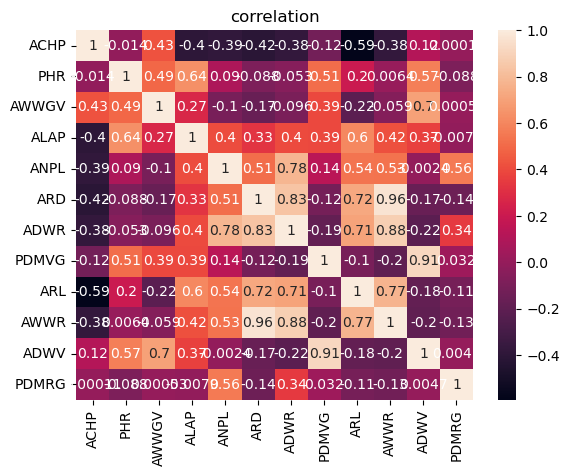

In [11]:
sns.heatmap(df.select_dtypes(["number"]).corr(),annot=True)
plt.title("correlation")

Text(0.5, 1.0, 'count of experimental group')

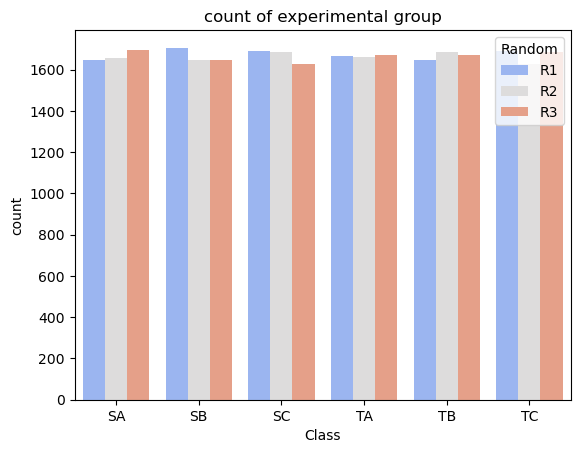

In [12]:
sns.countplot(data=df,x="Class",hue="Random",palette="coolwarm")
plt.title("count of experimental group")


Train - Test Split

In [14]:
x=df.drop(["Random","Class"],axis=1)
x

,ACHP,PHR,AWWGV,ALAP,ANPL,ARD,ADWR,PDMVG,ARL,AWWR,ADWV,PDMRG
0,34.533468,54.566983,1.147449,1284.229549,4.999713,16.274918,1.706810,18.399982,19.739037,2.949240,0.209251,57.633906
1,34.489028,54.567692,1.149530,1284.247744,5.024259,16.269452,1.700930,18.398289,19.758836,2.943137,0.216154,57.633697
2,33.100405,67.067344,1.104647,1009.208996,5.007652,15.980760,1.185391,19.398789,20.840822,2.861635,0.200113,41.289875
3,34.498319,54.559049,1.137759,1284.227623,4.991501,16.276710,1.716396,18.413613,19.736098,2.946784,0.223092,57.645661
4,36.297008,45.588894,1.363205,981.470310,4.003682,16.979894,0.777428,31.423772,17.331894,2.766242,0.424172,27.898619
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,46.400873,50.830830,0.883813,744.310093,4.012024,17.796293,1.085930,12.812881,18.457811,3.264946,0.108366,33.343799
29996,46.395047,50.838058,0.900390,744.307234,4.011764,17.809462,1.108226,12.822240,18.457313,3.259574,0.129387,33.338906
29997,32.707725,37.065408,0.909055,857.849380,2.992712,18.200984,0.903880,8.050019,19.070005,3.495121,0.056698,26.041147
29998,38.624079,37.876323,1.077557,948.663424,4.002284,15.733098,1.238818,11.953827,19.164418,3.141850,0.116892,39.125346


In [15]:
y=df.Class
y


0        SA
1        SA
2        SA
3        SA
4        SA
         ..
29995    TC
29996    TC
29997    TC
29998    TC
29999    TC
Name: Class, Length: 30000, dtype: object

In [16]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)
x_train

,ACHP,PHR,AWWGV,ALAP,ANPL,ARD,ADWR,PDMVG,ARL,AWWR,ADWV,PDMRG
21951,43.773149,65.453088,1.584459,1054.657832,4.004396,12.651806,0.761006,27.719623,12.376534,1.618087,0.425422,46.561100
9090,34.198121,75.023179,1.238569,1435.600757,3.986623,16.312410,0.771883,43.625988,20.365715,2.788299,0.545239,27.734783
8967,34.392335,74.913799,1.154785,1253.956755,4.004954,13.934058,0.689157,26.603026,20.491841,1.941535,0.317167,34.850856
21675,43.498682,72.475034,1.735645,943.626061,2.999228,13.847705,0.496566,37.569401,15.006500,1.570477,0.659346,34.405458
27085,32.686870,37.050111,0.928753,857.847400,3.005117,18.204830,0.905286,8.063265,19.051592,3.486918,0.081779,26.052130
...,...,...,...,...,...,...,...,...,...,...,...,...
15288,36.612703,55.884342,1.035733,739.250842,2.981544,13.870259,0.465393,21.976629,13.548119,1.460565,0.248715,32.507562
26243,38.609061,37.881154,1.074869,948.666425,3.989116,15.716861,1.209382,11.972825,19.162082,3.154208,0.125820,39.140114
11513,35.619532,66.447185,1.509195,1243.859396,5.000886,23.302788,2.160613,17.662708,23.210753,6.882236,0.271369,31.468090
1688,33.097266,67.076714,1.114568,1009.213652,4.989593,15.979638,1.180520,19.406155,20.861966,2.854138,0.217154,41.304672


In [17]:
y_train

21951    TB
9090     SB
8967     SB
21675    TB
27085    TC
         ..
15288    TA
26243    TC
11513    SC
1688     SA
5994     SB
Name: Class, Length: 24000, dtype: object

Training Pedictions

Decision Tree Classifier

In [20]:
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [21]:
DTpredict=DT.predict(x_test)
DTpredict

array(['TA', 'SB', 'SB', ..., 'TB', 'TC', 'TB'], dtype=object)

In [22]:
test1=DT.score(x_test,y_test)
train1=DT.score(x_train,y_train)
train1

1.0

In [63]:
dcr=classification_report(DTpredict,y_test)
dcr

'              precision    recall  f1-score   support\n\n          SA       1.00      1.00      1.00      1023\n          SB       1.00      1.00      1.00      1007\n          SC       1.00      1.00      1.00       977\n          TA       1.00      1.00      1.00      1000\n          TB       1.00      1.00      1.00       994\n          TC       1.00      1.00      1.00       999\n\n    accuracy                           1.00      6000\n   macro avg       1.00      1.00      1.00      6000\nweighted avg       1.00      1.00      1.00      6000\n'

RandomForest

In [24]:
RF=RandomForestClassifier()
RF.fit(x_train,y_train)



RandomForestClassifier()

In [25]:
RFpredict=RF.predict(x_test)
RFpredict

array(['TA', 'SB', 'SB', ..., 'TB', 'TC', 'TB'], dtype=object)

In [35]:
test2=RF.score(x_test,y_test)
train2=RF.score(x_train,y_train)

In [74]:
rcr=classification_report(RFpredict,y_test)
rcr

'              precision    recall  f1-score   support\n\n          SA       1.00      1.00      1.00      1023\n          SB       1.00      1.00      1.00      1007\n          SC       1.00      1.00      1.00       977\n          TA       1.00      1.00      1.00      1000\n          TB       1.00      1.00      1.00       994\n          TC       1.00      1.00      1.00       999\n\n    accuracy                           1.00      6000\n   macro avg       1.00      1.00      1.00      6000\nweighted avg       1.00      1.00      1.00      6000\n'

SVC

In [48]:
SV=SVC()
SV.fit(x_train,y_train)

SVC()

In [49]:
SVpredict=SV.predict(x_test)
SVpredict

array(['TA', 'SB', 'SB', ..., 'SC', 'TA', 'TB'], dtype=object)

In [50]:
test3=SV.score(x_test,y_test)
train3=SV.score(x_train,y_train)


In [51]:
cn=confusion_matrix(SVpredict,y_test)
cn

array([[1023,    0,    0,    0,    0,    0],
       [   0,  648,    0,    0,    0,    0],
       [   0,  359,  977,    0,  339,    0],
       [   0,    0,    0, 1000,    0,  325],
       [   0,    0,    0,    0,  655,    0],
       [   0,    0,    0,    0,    0,  674]], dtype=int64)

In [52]:
cr=classification_report(SVpredict,y_test)
cr

'              precision    recall  f1-score   support\n\n          SA       1.00      1.00      1.00      1023\n          SB       0.64      1.00      0.78       648\n          SC       1.00      0.58      0.74      1675\n          TA       1.00      0.75      0.86      1325\n          TB       0.66      1.00      0.79       655\n          TC       0.67      1.00      0.81       674\n\n    accuracy                           0.83      6000\n   macro avg       0.83      0.89      0.83      6000\nweighted avg       0.89      0.83      0.83      6000\n'

Logistic Regression

In [54]:
LR=LogisticRegression(max_iter=10000)
LR.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [55]:
LRpredict=LR.predict(x_test)
LRpredict

array(['TA', 'SB', 'SB', ..., 'TB', 'TC', 'TB'], dtype=object)

In [56]:
test4=LR.score(x_test,y_test)
train4=LR.score(x_train,y_train)

In [76]:
lcr=classification_report(LRpredict,y_test)
lcr

'              precision    recall  f1-score   support\n\n          SA       1.00      1.00      1.00      1023\n          SB       1.00      1.00      1.00      1007\n          SC       1.00      1.00      1.00       977\n          TA       1.00      1.00      1.00      1000\n          TB       1.00      1.00      1.00       994\n          TC       1.00      1.00      1.00       999\n\n    accuracy                           1.00      6000\n   macro avg       1.00      1.00      1.00      6000\nweighted avg       1.00      1.00      1.00      6000\n'

KNN

In [58]:
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [59]:
KNNpredict=KNN.predict(x_test)
KNNpredict

array(['TA', 'SB', 'SB', ..., 'TB', 'TC', 'TB'], dtype=object)

In [60]:
test5=KNN.score(x_test,y_test)
train5=KNN.score(x_train,y_train)

In [78]:
kcr=classification_report(KNNpredict,y_test)
kcr

'              precision    recall  f1-score   support\n\n          SA       1.00      1.00      1.00      1023\n          SB       1.00      1.00      1.00      1007\n          SC       1.00      1.00      1.00       977\n          TA       1.00      1.00      1.00      1000\n          TB       1.00      1.00      1.00       994\n          TC       1.00      1.00      1.00       999\n\n    accuracy                           1.00      6000\n   macro avg       1.00      1.00      1.00      6000\nweighted avg       1.00      1.00      1.00      6000\n'

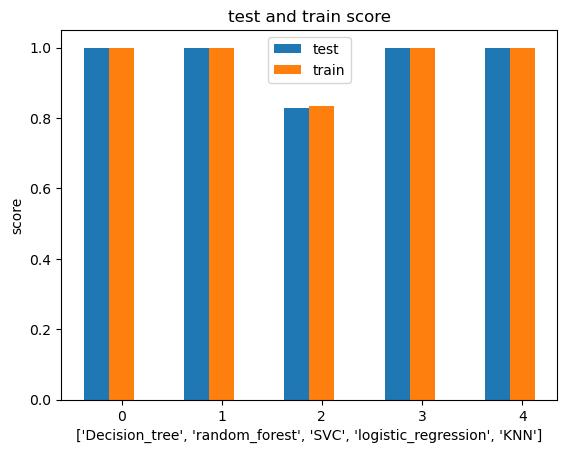

In [41]:
x=[test1,test2,test3,test4,test5]
y=[train1,train2,train3,train4,train5]
le=["test","train"]
model=["Decision_tree","random_forest","SVC","logistic_regression","KNN"]
x_range=np.arange(5)
width=.25
plt.bar(x_range-width,x,width=width)
plt.bar(x_range,y,width=width)
plt.xlabel(model)
plt.ylabel("score")
plt.title("test and train score")
plt.legend(le)
plt.show()

34.533468

54.566983

1.147449

1284.229549

4.999713

16.274918

1.706810

18.399982

19.739037

2.949240

0.209251

57.633906
SA- traditional green house

In [83]:
import numpy as np
import gradio as gr

def predict_type(ACHP, PHR, AWWGV, ALAP, ANPL, ARD, ADWR, PDMVG, ARL, AWWR, ADWV, PDMRG):
    input_data = np.array([ACHP, PHR, AWWGV, ALAP, ANPL, ARD, ADWR, PDMVG, ARL, AWWR, ADWV, PDMRG]).reshape(1, -1)
    
    # Ensure RF model is correctly trained and loaded
    prediction = RF.predict(input_data)
    print("Model Prediction:", prediction) 
    
    # Ensure correct comparison
    traditional_labels = {"SA", "SB", "SC"}  
    
    return "Traditional Greenhouse" if prediction[0] in traditional_labels else "IoT-based Greenhouse"

# Define Gradio interface
iface = gr.Interface(
    fn=predict_type,
    inputs=[
        gr.Number(label="Average chlorophyll content per plant"),
        gr.Number(label="Plant height rate"),
        gr.Number(label="Average wet weight of vegetative growth"),
        gr.Number(label="Average leaf area per plant"),
        gr.Number(label="Average number of leaves per plant"),
        gr.Number(label="Average root diameter"),
        gr.Number(label="Average dry weight of roots"),
        gr.Number(label="Percentage of dry matter in vegetative growth"),
        gr.Number(label="Average root length"),
        gr.Number(label="Average wet weight of roots"),
        gr.Number(label="Average dry weight of vegetative parts"),
        gr.Number(label="Percentage of dry matter in root growth"),
    ],
    outputs="text",
    title="Greenhouse Plant Growth",
    description="Enter the parameters and predict the type of greenhouse."
)

iface.launch()

* Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.
